In [1]:
import sqlite3
import sqlalchemy

In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:', echo=True)

In [3]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()


In [6]:
from sqlalchemy import Column, Integer, String, Float
class Stock(Base):
    __tablename__='stocks'
    id = Column(Integer, primary_key=True)
    sym = Column(String)
    price = Column(Float)
    

In [7]:
Base.metadata.create_all(engine)


2019-05-29 22:34:13,787 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-29 22:34:13,791 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:34:13,793 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-29 22:34:13,793 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:34:13,796 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("stocks")
2019-05-29 22:34:13,796 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:34:13,798 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE stocks (
	id INTEGER NOT NULL, 
	sym VARCHAR, 
	price FLOAT, 
	PRIMARY KEY (id)
)


2019-05-29 22:34:13,798 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:34:13,799 INFO sqlalchemy.engine.base.Engine COMMIT


In [10]:
#Base.classes.keys()

In [8]:
test_stock = Stock(sym = 'SPY', price = 277.88)
test_stock.sym

'SPY'

In [12]:
from sqlalchemy.orm import sessionmaker
Session= sessionmaker (bind=engine)
session = Session()


In [13]:
session.add(test_stock)

In [14]:
test_stock


In [15]:
session.commit()


2019-05-29 22:46:32,428 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-05-29 22:46:32,429 INFO sqlalchemy.engine.base.Engine INSERT INTO stocks (sym, price) VALUES (?, ?)
2019-05-29 22:46:32,430 INFO sqlalchemy.engine.base.Engine ('SPY', 277.88)
2019-05-29 22:46:32,431 INFO sqlalchemy.engine.base.Engine COMMIT


In [18]:
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

2019-05-29 22:51:50,456 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-29 22:51:50,457 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:51:50,458 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("stocks")
2019-05-29 22:51:50,459 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:51:50,460 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'stocks' AND type = 'table'
2019-05-29 22:51:50,460 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:51:50,462 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("stocks")
2019-05-29 22:51:50,462 INFO sqlalchemy.engine.base.Engine ()
2019-05-29 22:51:50,463 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'stocks' AND type = 'table'
2019-05-29 22:51:50,464 INFO sqlalchemy.engine.base.Engine ()
201

['stocks']

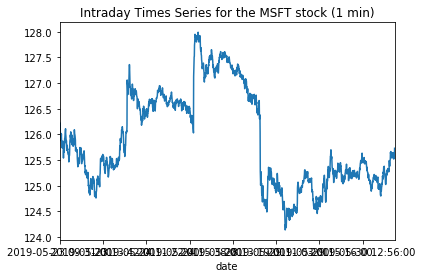

,date,1. open,2. high,3. low,4. close,5. volume,sdate
0,2019-05-23 09:31:00,126.2000,126.29,126.02,126.23,695747.0,2019-05-23 09:31
1,2019-05-23 09:32:00,126.2100,126.29,126.16,126.18,99458.0,2019-05-23 09:32
2,2019-05-23 09:33:00,126.1881,126.29,126.13,126.21,76888.0,2019-05-23 09:33
3,2019-05-23 09:34:00,126.2200,126.24,125.90,125.96,178182.0,2019-05-23 09:34
4,2019-05-23 09:35:00,125.9700,125.98,125.85,125.88,90408.0,2019-05-23 09:35


In [147]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import datetime as dt

api_key = ''

ts = TimeSeries(key=api_key, output_format='pandas')
data1, meta_data1 = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data1['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()
data1 = data1.reset_index()
i = 0
sdate = []
for d in data1['date']:
    sdate.append(data1['date'][i].replace(data1['date'][i],data1['date'][i][0:16],1))
    i+=1
#= data1['date'].replace(second=0, microsecond=0)
data1
data1['sdate'] = sdate
data1.head()

In [149]:
import pandas as pd
ta = TechIndicators(key=api_key, output_format='pandas')
data2, meta_data2 = ta.get_bbands(symbol = 'MSFT', interval = '1min', series_type='close', matype = 2)
#data1['Chaikin A/D'] = data2[0]['Chaikin A/D']
data2 = data2.reset_index()
data2['sdate'] = data2['date'] 
df= data1.merge(data2, how = 'left', on = 'sdate')
df.head(50)



,date_x,1. open,2. high,3. low,4. close,5. volume,sdate,date_y,Real Lower Band,Real Upper Band,Real Middle Band
0,2019-05-23 09:31:00,126.2000,126.2900,126.0200,126.2300,695747.0,2019-05-23 09:31,NaN,NaN,NaN,NaN
1,2019-05-23 09:32:00,126.2100,126.2900,126.1600,126.1800,99458.0,2019-05-23 09:32,NaN,NaN,NaN,NaN
2,2019-05-23 09:33:00,126.1881,126.2900,126.1300,126.2100,76888.0,2019-05-23 09:33,NaN,NaN,NaN,NaN
3,2019-05-23 09:34:00,126.2200,126.2400,125.9000,125.9600,178182.0,2019-05-23 09:34,NaN,NaN,NaN,NaN
4,2019-05-23 09:35:00,125.9700,125.9800,125.8500,125.8800,90408.0,2019-05-23 09:35,NaN,NaN,NaN,NaN
5,2019-05-23 09:36:00,125.8950,126.0100,125.8001,125.9881,139496.0,2019-05-23 09:36,NaN,NaN,NaN,NaN
6,2019-05-23 09:37:00,125.9850,126.0600,125.8630,126.0200,74910.0,2019-05-23 09:37,NaN,NaN,NaN,NaN
7,2019-05-23 09:38:00,126.0300,126.0400,125.9400,125.9800,57011.0,2019-05-23 09:38,NaN,NaN,NaN,NaN
8,2019-05-23 09:39:00,125.9800,126.0600,125.9100,125.9500,109388.0,2019-05-23 09:39,NaN,NaN,NaN,NaN
9,2019-05-23 09:40:00,125.9600,126.1400,125.9550,126.0100,85104.0,2019-05-23 09:40,NaN,NaN,NaN,NaN


In [45]:
class Car():
    def start(self):
        print('started')
    def stop(self): 
        print('stopped')
#car = Car().start()
car

car = Car()
car.start()

started


In [55]:
class Myclass(object):
    def set_val(self,val):
        self.value = val
        self.rand_val = random.randint(1,10)
        
    def get_val(self):
        return self.value

a = Myclass()
a.set_val(10)
a.get_val()


10

In [35]:
this_object = Myclass()
print(this_object.var)

this_object = Myclass()
print(this_object.var)

10
10


In [50]:
import random

class Eric(object):
    def callme(self):
        self.rand_val = random.randint(1,10)
        print('call me!')

this = Eric()
this.callme()
this.rand_val
        

call me!


6

In [62]:
class MyNum(object):
    def __init__(self):
        print('calling')
        self.valu = 10
    def increment(self):
        self.valu +=1

dd = MyNum()
dd.increment()

dd.valu

calling


11